# Constructing glycolysis

In [146]:
from os import path

import matplotlib.pyplot as plt

from cobra import DictList

from mass import (
    MassConfiguration, MassMetabolite, MassModel,
    MassReaction, Simulation, UnitDefinition)
from mass.io import json, sbml
from mass.util import qcqa_model

mass_config = MassConfiguration()

In [147]:
glycolysis = MassModel("Glycolysis")

In [148]:
glc__D_c = MassMetabolite(
    "glc__D_c",
    name="D-Glucose",
    formula="C6H12O6",
    charge=0,
    compartment="c",
    fixed=False)

g6p_c = MassMetabolite(
    "g6p_c",
    name="D-Glucose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

f6p_c = MassMetabolite(
    "f6p_c",
    name="D-Fructose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

fdp_c = MassMetabolite(
    "fdp_c",
    name="D-Fructose 1,6-bisphosphate",
    formula="C6H10O12P2",
    charge=-4,
    compartment="c",
    fixed=False)

dhap_c = MassMetabolite(
    "dhap_c",
    name="Dihydroxyacetone phosphate",
    formula="C3H5O6P",
    charge=-2,
    compartment="c",
    fixed=False)

g3p_c = MassMetabolite(
    "g3p_c",
    name="Glyceraldehyde 3-phosphate",
    formula="C3H5O6P",
    charge=-2,
    compartment="c",
    fixed=False)

_13dpg_c = MassMetabolite(
    "_13dpg_c",
    name="3-Phospho-D-glyceroyl phosphate",
    formula="C3H4O10P2",
    charge=-4,
    compartment="c",
    fixed=False)

_3pg_c = MassMetabolite(
    "_3pg_c",
    name="3-Phospho-D-glycerate",
    formula="C3H4O7P",
    charge=-3,
    compartment="c",
    fixed=False)

_2pg_c = MassMetabolite(
    "_2pg_c",
    name="D-Glycerate 2-phosphate",
    formula="C3H4O7P",
    charge=-3,
    compartment="c",
    fixed=False)

pep_c = MassMetabolite(
    "pep_c",
    name="Phosphoenolpyruvate",
    formula="C3H2O6P",
    charge=-3,
    compartment="c",
    fixed=False)

pyr_c = MassMetabolite(
    "pyr_c",
    name="Pyruvate",
    formula="C3H3O3",
    charge=-1,
    compartment="c",
    fixed=False)

lac__L_c = MassMetabolite(
    "lac__L_c",
    name="L-Lactate",
    formula="C3H5O3",
    charge=-1,
    compartment="c",
    fixed=False)

nad_c = MassMetabolite(
    "nad_c",
    name="Nicotinamide adenine dinucleotide",
    formula="[NAD]-C21H26N7O14P2",
    charge=-1,
    compartment="c",
    fixed=False)

nadh_c = MassMetabolite(
    "nadh_c",
    name="Nicotinamide adenine dinucleotide - reduced",
    formula="[NAD]-C21H27N7O14P2",
    charge=-2,
    compartment="c",
    fixed=False)

atp_c = MassMetabolite(
    "atp_c",
    name="ATP",
    formula="C10H12N5O13P3",
    charge=-4,
    compartment="c",
    fixed=False)

adp_c = MassMetabolite(
    "adp_c",
    name="ADP",
    formula="C10H12N5O10P2",
    charge=-3,
    compartment="c",
    fixed=False)

amp_c = MassMetabolite(
    "amp_c",
    name="AMP",
    formula="C10H12N5O7P",
    charge=-2,
    compartment="c",
    fixed=False)

pi_c = MassMetabolite(
    "pi_c",
    name="Phosphate",
    formula="HPO4",
    charge=-2,
    compartment="c",
    fixed=False)

h_c = MassMetabolite(
    "h_c",
    name="H+",
    formula="H",
    charge=1,
    compartment="c",
    fixed=False)

h2o_c = MassMetabolite(
    "h2o_c",
    name="H2O",
    formula="H2O",
    charge=0,
    compartment="c",
    fixed=False)

In [149]:
HEX1 = MassReaction(
    "HEX1",
    name="Hexokinase (D-glucose:ATP)",
    subsystem=glycolysis.id,
    reversible=True)
HEX1.add_metabolites({
    glc__D_c: -1,
    atp_c: -1,
    adp_c: 1,
    g6p_c: 1,
    h_c: 1})

PGI = MassReaction(
    "PGI",
    name="Glucose-6-phosphate isomerase",
    subsystem=glycolysis.id,
    reversible=True)
PGI.add_metabolites({
    g6p_c: -1,
    f6p_c: 1})

PFK = MassReaction(
    "PFK",
    name="Phosphofructokinase",
    subsystem=glycolysis.id,
    reversible=True)
PFK.add_metabolites({
    f6p_c: -1,
    atp_c: -1,
    fdp_c: 1,
    adp_c: 1,
    h_c: 1})

FBA = MassReaction(
    "FBA",
    name="Fructose-bisphosphate aldolase",
    subsystem=glycolysis.id,
    reversible=True)
FBA.add_metabolites({
    fdp_c: -1,
    dhap_c: 1,
    g3p_c: 1})

TPI = MassReaction(
    "TPI",
    name="Triose-phosphate isomerase",
    subsystem=glycolysis.id,
    reversible=True)
TPI.add_metabolites({
    dhap_c: -1,
    g3p_c: 1})

GAPD = MassReaction(
    "GAPD",
    name="Glyceraldehyde-3-phosphate dehydrogenase",
    subsystem=glycolysis.id,
    reversible=True)
GAPD.add_metabolites({
    g3p_c: -1,
    nad_c: -1,
    pi_c: -1,
    _13dpg_c: 1,
    h_c: 1,
    nadh_c: 1})

PGK = MassReaction(
    "PGK",
    name="Phosphoglycerate kinase",
    subsystem=glycolysis.id,
    reversible=True)
PGK.add_metabolites({
    _13dpg_c: -1,
    adp_c: -1,
    _3pg_c: 1,
    atp_c: 1})

PGM = MassReaction(
    "PGM",
    name="Phosphoglycerate mutase",
    subsystem=glycolysis.id,
    reversible=True)
PGM.add_metabolites({
    _3pg_c: -1,
    _2pg_c: 1})

ENO = MassReaction(
    "ENO",
    name="Enolase",
    subsystem=glycolysis.id,
    reversible=True)
ENO.add_metabolites({
    _2pg_c: -1,
    h2o_c: 1,
    pep_c: 1})

PYK = MassReaction(
    "PYK",
    name="Pyruvate kinase",
    subsystem=glycolysis.id,
    reversible=True)
PYK.add_metabolites({
    pep_c: -1,
    h_c: -1,
    adp_c: -1,
    atp_c: 1,
    pyr_c: 1})

LDH_L = MassReaction(
    "LDH_L",
    name="L-lactate dehydrogenase",
    subsystem=glycolysis.id,
    reversible=True)
LDH_L.add_metabolites({
    h_c: -1,
    nadh_c: -1,
    pyr_c: -1,
    lac__L_c: 1,
    nad_c: 1})

ADK1 = MassReaction(
    "ADK1",
    name="Adenylate kinase",
    subsystem="Misc.",
    reversible=True)
ADK1.add_metabolites({
    adp_c: -2,
    amp_c: 1,
    atp_c: 1})

ATPM = MassReaction(
    "ATPM",
    name="ATP maintenance requirement",
    subsystem="Pseudoreaction",
    reversible=False)
ATPM.add_metabolites({
    atp_c: -1,
    h2o_c: -1,
    adp_c: 1,
    h_c: 1,
    pi_c: 1})

DM_nadh = MassReaction(
    "DM_nadh",
    name="Demand NADH",
    subsystem="Pseudoreaction",
    reversible=False)
DM_nadh.add_metabolites({
    nadh_c: -1,
    nad_c: 1,
    h_c: 1})

In [150]:
glycolysis.add_reactions([
    HEX1, PGI, PFK, FBA, TPI, GAPD, PGK,
    PGM, ENO, PYK, LDH_L, ADK1, ATPM, DM_nadh])

for reaction in glycolysis.reactions:
    print(reaction)

HEX1: atp_c + glc__D_c <=> adp_c + g6p_c + h_c
PGI: g6p_c <=> f6p_c
PFK: atp_c + f6p_c <=> adp_c + fdp_c + h_c
FBA: fdp_c <=> dhap_c + g3p_c
TPI: dhap_c <=> g3p_c
GAPD: g3p_c + nad_c + pi_c <=> _13dpg_c + h_c + nadh_c
PGK: _13dpg_c + adp_c <=> _3pg_c + atp_c
PGM: _3pg_c <=> _2pg_c
ENO: _2pg_c <=> h2o_c + pep_c
PYK: adp_c + h_c + pep_c <=> atp_c + pyr_c
LDH_L: h_c + nadh_c + pyr_c <=> lac__L_c + nad_c
ADK1: 2 adp_c <=> amp_c + atp_c
ATPM: atp_c + h2o_c --> adp_c + h_c + pi_c
DM_nadh: nadh_c --> h_c + nad_c


In [151]:
SK_glc__D_c = glycolysis.add_boundary(
    metabolite=glc__D_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_glc__D_c.reverse_stoichiometry(inplace=True)

SK_lac__L_c = glycolysis.add_boundary(
    metabolite=lac__L_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

SK_pyr_c = glycolysis.add_boundary(
    metabolite=pyr_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=0.06)

SK_h_c = glycolysis.add_boundary(
    metabolite=h_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=6.30957e-05)

SK_h2o_c = glycolysis.add_boundary(
    metabolite=h2o_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

SK_amp_c = glycolysis.add_boundary(
    metabolite=amp_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_amp_c.reverse_stoichiometry(inplace=True)

DM_amp_c = glycolysis.add_boundary(
    metabolite=amp_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)

print("Boundary Reactions and Values\n-----------------------------")
for reaction in glycolysis.boundary:
    boundary_met = reaction.boundary_metabolite
    bc_value = glycolysis.boundary_conditions.get(boundary_met)
    print("{0}\n{1}: {2}\n".format(
        reaction, boundary_met, bc_value))

Boundary Reactions and Values
-----------------------------
SK_glc__D_c:  <=> glc__D_c
glc__D_b: 1.0

SK_lac__L_c: lac__L_c <=> 
lac__L_b: 1.0

SK_pyr_c: pyr_c <=> 
pyr_b: 0.06

SK_h_c: h_c <=> 
h_b: 6.30957e-05

SK_h2o_c: h2o_c <=> 
h2o_b: 1.0

SK_amp_c:  <=> amp_c
amp_b: 1.0

DM_amp_c: amp_c --> 
amp_b: 1.0



In [152]:
new_metabolite_order = [
    "glc__D_c", "g6p_c", "f6p_c", "fdp_c", "dhap_c",
    "g3p_c", "_13dpg_c", "_3pg_c", "_2pg_c", "pep_c",
    "pyr_c", "lac__L_c", "nad_c", "nadh_c", "amp_c",
    "adp_c", "atp_c", "pi_c", "h_c", "h2o_c"]

if len(glycolysis.metabolites) == len(new_metabolite_order):
    glycolysis.metabolites = DictList(
        glycolysis.metabolites.get_by_any(new_metabolite_order))

new_reaction_order = [
    "HEX1", "PGI", "PFK", "FBA", "TPI",
    "GAPD", "PGK", "PGM", "ENO", "PYK",
    "LDH_L", "DM_amp_c", "ADK1", "SK_pyr_c",
    "SK_lac__L_c", "ATPM", "DM_nadh", "SK_glc__D_c",
    "SK_amp_c", "SK_h_c", "SK_h2o_c"]

if len(glycolysis.reactions) == len(new_reaction_order):
    glycolysis.reactions = DictList(
        glycolysis.reactions.get_by_any(new_reaction_order))

glycolysis.update_S(array_type="DataFrame", dtype=int)

,HEX1,PGI,PFK,FBA,TPI,GAPD,PGK,PGM,ENO,PYK,...,DM_amp_c,ADK1,SK_pyr_c,SK_lac__L_c,ATPM,DM_nadh,SK_glc__D_c,SK_amp_c,SK_h_c,SK_h2o_c
glc__D_c,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
g6p_c,1,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f6p_c,0,1,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fdp_c,0,0,1,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dhap_c,0,0,0,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
g3p_c,0,0,0,1,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_13dpg_c,0,0,0,0,0,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_3pg_c,0,0,0,0,0,0,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
_2pg_c,0,0,0,0,0,0,0,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
pep_c,0,0,0,0,0,0,0,0,1,-1,...,0,0,0,0,0,0,0,0,0,0


## Checking

In [153]:
glycolysis.stoichiometric_matrix.sum(axis=0)

HEX1           1
PGI            0
PFK            1
FBA            1
TPI            0
GAPD           0
PGK            0
PGM            0
ENO            1
PYK           -1
LDH_L         -1
DM_amp_c      -1
ADK1           0
SK_pyr_c      -1
SK_lac__L_c   -1
ATPM           1
DM_nadh        1
SK_glc__D_c    1
SK_amp_c       1
SK_h_c        -1
SK_h2o_c      -1
dtype: int64

In [154]:
minspan_paths = [
    [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, -1, 0, 1, 0, 0, 2, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
glycolysis.compute_steady_state_fluxes(
    pathways=minspan_paths,
    independent_fluxes={
        SK_glc__D_c: 1.12,
        DM_nadh: .2 * 1.12,
        DM_amp_c: 0.014},
    update_reactions=True)

print("Steady State Fluxes\n-------------------")
for reaction, steady_state_flux in glycolysis.steady_state_fluxes.items():
    print("{0}: {1:.6f}".format(reaction.flux_symbol_str, steady_state_flux))

Steady State Fluxes
-------------------
v_HEX1: 1.120000
v_PGI: 1.120000
v_PFK: 1.120000
v_FBA: 1.120000
v_TPI: 1.120000
v_GAPD: 2.240000
v_PGK: 2.240000
v_PGM: 2.240000
v_ENO: 2.240000
v_PYK: 2.240000
v_LDH_L: 2.016000
v_DM_amp_c: 0.014000
v_ADK1: 0.000000
v_SK_pyr_c: 0.224000
v_SK_lac__L_c: 2.016000
v_ATPM: 2.240000
v_DM_nadh: 0.224000
v_SK_glc__D_c: 1.120000
v_SK_amp_c: 0.014000
v_SK_h_c: 2.688000
v_SK_h2o_c: 0.000000


In [155]:
glc__D_c.ic = 1.0
g6p_c.ic = 0.0486
f6p_c.ic = 0.0198
fdp_c.ic = 0.0146
g3p_c.ic = 0.00728
dhap_c.ic = 0.16
_13dpg_c.ic = 0.000243
_3pg_c.ic = 0.0773
_2pg_c.ic = 0.0113
pep_c.ic = 0.017
pyr_c.ic = 0.060301
lac__L_c.ic = 1.36
atp_c.ic = 1.6
adp_c.ic = 0.29
amp_c.ic = 0.0867281
h_c.ic = 0.0000899757
nad_c.ic = 0.0589
nadh_c.ic = 0.0301
pi_c.ic = 2.5
h2o_c.ic = 1.0

print("Initial Conditions\n------------------")
for metabolite, ic_value in glycolysis.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))

Initial Conditions
------------------
glc__D_c: 1.0
g6p_c: 0.0486
f6p_c: 0.0198
fdp_c: 0.0146
dhap_c: 0.16
g3p_c: 0.00728
_13dpg_c: 0.000243
_3pg_c: 0.0773
_2pg_c: 0.0113
pep_c: 0.017
pyr_c: 0.060301
lac__L_c: 1.36
nad_c: 0.0589
nadh_c: 0.0301
amp_c: 0.0867281
adp_c: 0.29
atp_c: 1.6
pi_c: 2.5
h_c: 8.99757e-05
h2o_c: 1.0


In [156]:
HEX1.Keq = 850
PGI.Keq = 0.41
PFK.Keq = 310
FBA.Keq = 0.082
TPI.Keq = 0.0571429
GAPD.Keq = 0.0179
PGK.Keq = 1800
PGM.Keq = 0.147059
ENO.Keq = 1.69492
PYK.Keq = 363000
LDH_L.Keq = 26300
ADK1.Keq = 1.65

SK_glc__D_c.Keq = mass_config.irreversible_Keq
SK_lac__L_c.Keq = 1
SK_pyr_c.Keq = 1
SK_h_c.Keq = 1
SK_h2o_c.Keq = 1
SK_amp_c.Keq = mass_config.irreversible_Keq

print("Equilibrium Constants\n---------------------")
for reaction in glycolysis.reactions:
    print("{0}: {1}".format(reaction.Keq_str, reaction.Keq))

Equilibrium Constants
---------------------
Keq_HEX1: 850
Keq_PGI: 0.41
Keq_PFK: 310
Keq_FBA: 0.082
Keq_TPI: 0.0571429
Keq_GAPD: 0.0179
Keq_PGK: 1800
Keq_PGM: 0.147059
Keq_ENO: 1.69492
Keq_PYK: 363000
Keq_LDH_L: 26300
Keq_DM_amp_c: inf
Keq_ADK1: 1.65
Keq_SK_pyr_c: 1
Keq_SK_lac__L_c: 1
Keq_ATPM: inf
Keq_DM_nadh: inf
Keq_SK_glc__D_c: inf
Keq_SK_amp_c: inf
Keq_SK_h_c: 1
Keq_SK_h2o_c: 1


In [157]:
glycolysis.calculate_PERCs(update_reactions=True)

print("Forward Rate Constants\n----------------------")
for reaction in glycolysis.reactions:
    print("{0}: {1:.6f}".format(reaction.kf_str, reaction.kf))

Forward Rate Constants
----------------------
kf_HEX1: 0.700007
kf_PGI: 3644.444444
kf_PFK: 35.368784
kf_FBA: 2834.567901
kf_TPI: 34.355728
kf_GAPD: 3376.749242
kf_PGK: 1273531.269741
kf_PGM: 4868.589299
kf_ENO: 1763.740525
kf_PYK: 454.385552
kf_LDH_L: 1112.573989
kf_DM_amp_c: 0.161424
kf_ADK1: 100000.000000
kf_SK_pyr_c: 744.186047
kf_SK_lac__L_c: 5.600000
kf_ATPM: 1.400000
kf_DM_nadh: 7.441860
kf_SK_glc__D_c: 1.120000
kf_SK_amp_c: 0.014000
kf_SK_h_c: 100000.000000
kf_SK_h2o_c: 100000.000000


In [158]:
qcqa_model(glycolysis, parameters=True, concentrations=True,
           fluxes=True, superfluous=True, elemental=True)

╒══════════════════════════════════════════════╕
│ MODEL ID: Glycolysis                         │
│ SIMULATABLE: True                            │
│ PARAMETERS NUMERICALY CONSISTENT: True       │
╞══════════════════════════════════════════════╡
│ ============================================ │
│             CONSISTENCY CHECKS               │
│ ============================================ │
│ Elemental                                    │
│ ----------------------                       │
│ DM_nadh: {charge: 2.0}                       │
│ ============================================ │
╘══════════════════════════════════════════════╛


Successfully loaded MassModel 'Glycolysis' into RoadRunner.


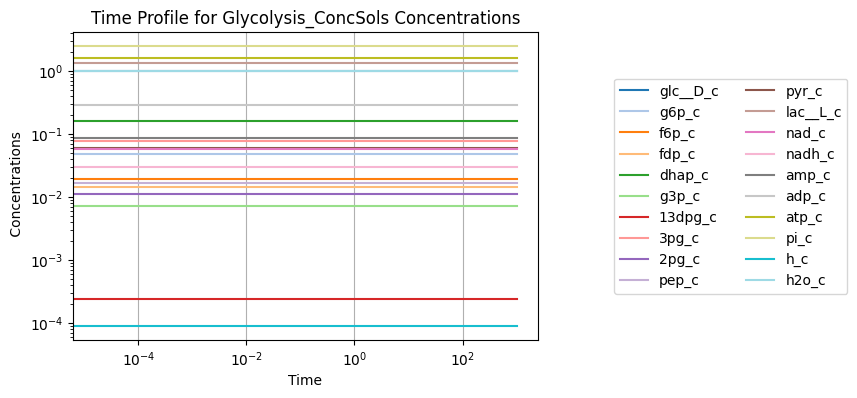

In [159]:
# Setup simulation object
sim = Simulation(glycolysis, verbose=True)
# Simulate from 0 to 1000 with 10001 points in the output
conc_sol, flux_sol = sim.simulate(glycolysis, time=(0, 1e3))
# Quickly render and display time profiles
conc_sol.view_time_profile()

In [160]:
glycolysis.compartments = {"c": "Cytosol"}
print(glycolysis.compartments)

{'c': 'Cytosol'}


In [161]:
# Using pre-build units to define UnitDefinitions
concentration = UnitDefinition("mM", name="Millimolar", list_of_units=["millimole", "per_litre"])
time = UnitDefinition("hr", name="hour", list_of_units=["hour"])

# Add units to model
glycolysis.add_units([concentration, time])
print(glycolysis.units)

[<UnitDefinition Millimolar "mM" at 0x1d9666e2688>, <UnitDefinition hour "hr" at 0x1d9666e2908>]


## Change the fluxes by changing the boundary condition of glucose

When the boundary is disturbed, the concentrations will dynamically change

Successfully loaded MassModel 'Glycolysis' into RoadRunner.


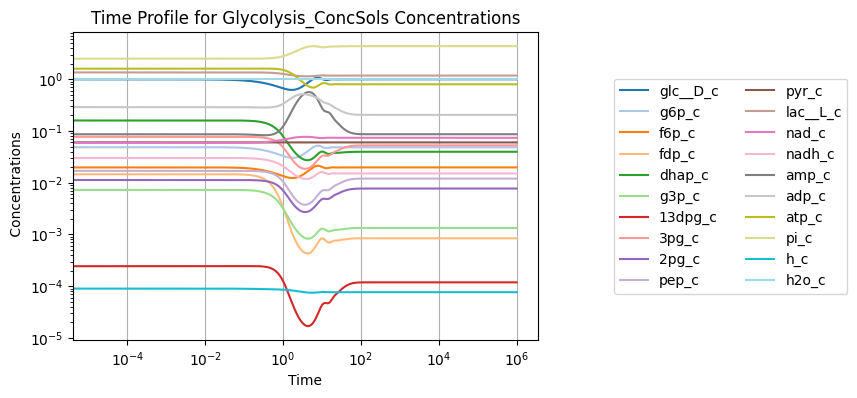

In [162]:
# Setup simulation object
sim = Simulation(glycolysis, verbose=True)
# Simulate from 0 to 1000 with 10001 points in the output
conc_sol, flux_sol = sim.simulate(glycolysis, time=(0, 1e6),perturbations={'glc__D_b':0.5})
# Quickly render and display time profiles
conc_sol.view_time_profile()

In [163]:
flux_sol.to_frame()

,HEX1,PGI,PFK,FBA,TPI,GAPD,PGK,PGM,ENO,PYK,...,DM_amp_c,ADK1,SK_pyr_c,SK_lac__L_c,ATPM,DM_nadh,SK_glc__D_c,SK_amp_c,SK_h_c,SK_h2o_c
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,1.120000,1.120000,1.12,1.12,1.12,2.24,2.240000,2.24,2.24,2.24,...,0.014,2.424242e-03,0.224000,2.016000,2.24,0.224000,0.56,0.014,2.688000,0.000000e+00
0.000014,1.119991,1.120000,1.12,1.12,1.12,2.24,2.239999,2.24,2.24,2.24,...,0.014,6.015589e-04,0.224000,2.016000,2.24,0.224000,0.56,0.014,2.687995,-8.493206e-09
0.000035,1.119978,1.119998,1.12,1.12,1.12,2.24,2.240000,2.24,2.24,2.24,...,0.014,1.026800e-04,0.224000,2.016000,2.24,0.224000,0.56,0.014,2.687984,-1.849632e-08
0.000073,1.119954,1.119995,1.12,1.12,1.12,2.24,2.240000,2.24,2.24,2.24,...,0.014,-9.165599e-07,0.224000,2.016000,2.24,0.224000,0.56,0.014,2.687960,-3.071987e-08
0.000160,1.119900,1.119982,1.12,1.12,1.12,2.24,2.240000,2.24,2.24,2.24,...,0.014,-2.750228e-05,0.224000,2.016000,2.24,0.224000,0.56,0.014,2.687906,-5.739853e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135.574465,0.560000,0.560000,0.56,0.56,0.56,1.12,1.120000,1.12,1.12,1.12,...,0.014,-1.446135e-08,0.112451,1.007549,1.12,0.112451,0.56,0.014,1.344901,0.000000e+00
4043.121036,0.560000,0.560000,0.56,0.56,0.56,1.12,1.120000,1.12,1.12,1.12,...,0.014,-1.833256e-09,0.112451,1.007549,1.12,0.112451,0.56,0.014,1.344901,0.000000e+00
33118.586754,0.560000,0.560000,0.56,0.56,0.56,1.12,1.120000,1.12,1.12,1.12,...,0.014,-7.216450e-11,0.112451,1.007549,1.12,0.112451,0.56,0.014,1.344901,0.000000e+00


Final concentration values from the simulation  can be found and converted to dict like this

In [164]:
end_dict = conc_sol.to_frame().iloc[-1].to_dict()
end_dict

{'glc__D_c': 1.0000042404883371,
 'g6p_c': 0.04842722468191601,
 'f6p_c': 0.019792162119585562,
 'fdp_c': 0.0008446545683466512,
 'dhap_c': 0.03969366823162874,
 'g3p_c': 0.0013367793143931378,
 '_13dpg_c': 0.00011867302729931947,
 '_3pg_c': 0.052775454889957045,
 '_2pg_c': 0.007727275270662193,
 'pep_c': 0.012020815401750765,
 'pyr_c': 0.060151105623522085,
 'lac__L_c': 1.1799195184688258,
 'nad_c': 0.07388943764779149,
 'nadh_c': 0.01511056235220857,
 'amp_c': 0.0867281,
 'adp_c': 0.2050609369889543,
 'atp_c': 0.7999999999999999,
 'pi_c': 4.37220502794605,
 'h_c': 7.654471393149151e-05,
 'h2o_c': 1.0}

# update initial values with last values from previous simulation 

In [165]:
for idx, metabolite in enumerate(end_dict.keys()):
    sim.reference_model.metabolites[idx].ic = end_dict[metabolite]

In [166]:
sim.reference_model.ics

{<MassMetabolite glc__D_c at 0x1d9651c5648>: 1.0000042404883371,
 <MassMetabolite g6p_c at 0x1d965245808>: 0.04842722468191601,
 <MassMetabolite f6p_c at 0x1d9651c56c8>: 0.019792162119585562,
 <MassMetabolite fdp_c at 0x1d9651c5588>: 0.0008446545683466512,
 <MassMetabolite dhap_c at 0x1d9651c5708>: 0.03969366823162874,
 <MassMetabolite g3p_c at 0x1d9651c5748>: 0.0013367793143931378,
 <MassMetabolite _13dpg_c at 0x1d9651c5a88>: 0.00011867302729931947,
 <MassMetabolite _3pg_c at 0x1d9651c5c48>: 0.052775454889957045,
 <MassMetabolite _2pg_c at 0x1d9651c5fc8>: 0.007727275270662193,
 <MassMetabolite pep_c at 0x1d9651c5d88>: 0.012020815401750765,
 <MassMetabolite pyr_c at 0x1d9651c5f48>: 0.060151105623522085,
 <MassMetabolite lac__L_c at 0x1d9651c5f88>: 1.1799195184688258,
 <MassMetabolite nad_c at 0x1d9651c5c88>: 0.07388943764779149,
 <MassMetabolite nadh_c at 0x1d9651c58c8>: 0.01511056235220857,
 <MassMetabolite amp_c at 0x1d9651c5208>: 0.0867281,
 <MassMetabolite adp_c at 0x1d9651c51c8>: 

## Now that the initial values are changed, set the boundary to another value and run the sim again

Successfully loaded MassModel 'Glycolysis' into RoadRunner.


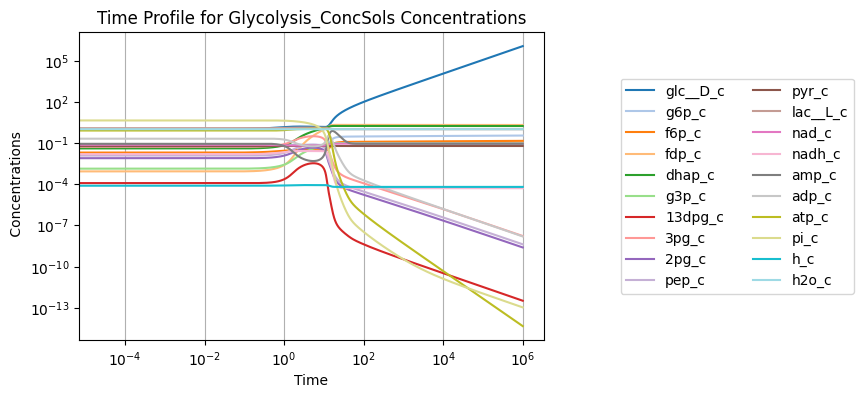

In [168]:
# Setup simulation object
sim = Simulation(glycolysis, verbose=True)
# Simulate from 0 to 1000 with 10001 points in the output
conc_sol, flux_sol = sim.simulate(glycolysis, time=(0, 1e6),perturbations={'glc__D_b':1})
# Quickly render and display time profiles
conc_sol.view_time_profile()

In [144]:
flux_sol.to_frame()

,HEX1,PGI,PFK,FBA,TPI,GAPD,PGK,PGM,ENO,PYK,...,DM_amp_c,ADK1,SK_pyr_c,SK_lac__L_c,ATPM,DM_nadh,SK_glc__D_c,SK_amp_c,SK_h_c,SK_h2o_c
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,0.560000,0.560000,0.560000,5.600000e-01,5.600000e-01,1.120000e+00,1.120000e+00,1.120000e+00,1.120000e+00,1.120000e+00,...,0.014,1.640706e-06,0.112451,1.007549,1.120000e+00,0.112451,1.12,0.014,1.344901,1.998401e-10
0.000024,0.560007,0.560000,0.560000,5.600000e-01,5.600000e-01,1.120000e+00,1.120000e+00,1.120000e+00,1.120000e+00,1.120000e+00,...,0.014,2.305370e-06,0.112451,1.007549,1.120000e+00,0.112451,1.12,0.014,1.344907,3.330669e-10
0.000047,0.560015,0.560001,0.560000,5.600000e-01,5.600000e-01,1.120000e+00,1.120000e+00,1.120000e+00,1.120000e+00,1.120000e+00,...,0.014,4.376168e-06,0.112451,1.007549,1.120000e+00,0.112451,1.12,0.014,1.344913,6.217249e-10
0.000111,0.560035,0.560005,0.560000,5.600000e-01,5.600000e-01,1.120000e+00,1.120000e+00,1.120000e+00,1.120000e+00,1.120000e+00,...,0.014,1.112668e-05,0.112451,1.007549,1.120000e+00,0.112451,1.12,0.014,1.344933,2.953193e-09
0.000286,0.560090,0.560020,0.560000,5.600000e-01,5.600000e-01,1.120000e+00,1.120000e+00,1.120000e+00,1.120000e+00,1.120000e+00,...,0.014,2.977550e-05,0.112451,1.007549,1.120000e+00,0.112451,1.12,0.014,1.344988,2.275957e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959.105236,0.000004,-0.000002,-0.000004,-7.014870e-07,6.329248e-07,7.443877e-09,7.444260e-09,2.113137e-08,2.314418e-08,2.655570e-08,...,0.014,1.781897e-08,0.000377,-0.000377,7.443217e-09,0.000377,1.12,0.014,0.000755,1.569855e-08
972.654221,0.000004,-0.000002,-0.000004,-6.916293e-07,6.239209e-07,7.233963e-09,7.234312e-09,2.055709e-08,2.251632e-08,2.583699e-08,...,0.014,1.722502e-08,0.000377,-0.000377,7.233330e-09,0.000377,1.12,0.014,0.000755,1.527667e-08
986.203205,0.000004,-0.000002,-0.000004,-6.819769e-07,6.151673e-07,7.032693e-09,7.033069e-09,2.000593e-08,2.191370e-08,2.514722e-08,...,0.014,1.689330e-08,0.000377,-0.000377,7.032083e-09,0.000377,1.12,0.014,0.000755,1.487699e-08


In [168]:
end_dict = conc_sol.to_frame().iloc[-1].to_dict()
end_dict

{'glc__D_c': 0.9914206061704323,
 'g6p_c': 0.04794881578359122,
 'f6p_c': 0.019621268469687734,
 'fdp_c': 0.00028285653332095977,
 'dhap_c': 0.0210063073247567,
 'g3p_c': 0.0006420989249610373,
 '_13dpg_c': 0.00012530973924705164,
 '_3pg_c': 0.05301441679580941,
 '_2pg_c': 0.007775974790082684,
 'pep_c': 0.012534702937138688,
 'pyr_c': 0.06009073942236401,
 'lac__L_c': 1.1078875902715621,
 'nad_c': 0.07991546840320311,
 'nadh_c': 0.009084531596797032,
 'amp_c': 0.04739092411239865,
 'adp_c': 0.11783988776511413,
 'atp_c': 0.4834732389455901,
 'pi_c': 5.11281971677265,
 'h_c': 7.121511575879506e-05,
 'h2o_c': 0.9999999427735787}

## Now that the initial values are changed, set the boundary to another value and run the sim again

In [171]:
sim.reference_model.boundary_conditions.update({'glc__D_b':0.6})
sim.reference_model.boundary_conditions.update({'amp_b':0.6})

In [172]:
sim.reference_model.boundary_conditions

{'glc__D_b': 0.6,
 'lac__L_b': 1.0,
 'pyr_b': 0.06,
 'h_b': 6.30957e-05,
 'h2o_b': 1.0,
 'amp_b': 0.6}

Successfully loaded MassModel 'Glycolysis' into RoadRunner.


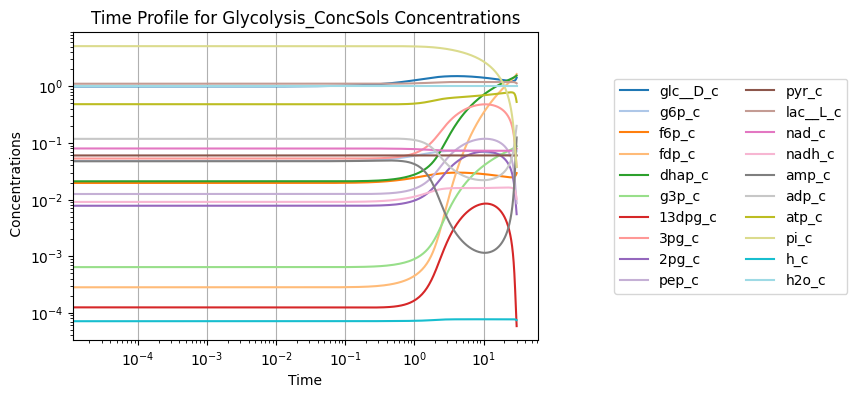

In [173]:
# Setup simulation object
sim = Simulation(glycolysis, verbose=True)
# Simulate from 0 to 1000 with 10001 points in the output
conc_sol, flux_sol = sim.simulate(glycolysis, time=(0, 30))
# Quickly render and display time profiles
conc_sol.view_time_profile()

In [174]:
end_dict = conc_sol.to_frame().iloc[-1].to_dict()
end_dict

{'glc__D_c': 1.4128602551065785,
 'g6p_c': 0.0716544162943301,
 'f6p_c': 0.029320339616572395,
 'fdp_c': 1.6417390100542246,
 'dhap_c': 1.5400229644371761,
 'g3p_c': 0.08740832474025415,
 '_13dpg_c': 5.8396447988169715e-05,
 '_3pg_c': 0.03770484631798403,
 '_2pg_c': 0.00552138461223956,
 'pep_c': 0.008609674455644376,
 'pyr_c': 0.06013241569442265,
 'lac__L_c': 1.127999209711532,
 'nad_c': 0.07870881011467819,
 'nadh_c': 0.010291189885322027,
 'amp_c': 0.12489204084748688,
 'adp_c': 0.20022592724362634,
 'atp_c': 0.5296838746471139,
 'pi_c': 0.03753555998280555,
 'h_c': 7.453978347864702e-05,
 'h2o_c': 1.0000003747094666}